# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2

my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price

btc_response = requests.get(btc_url)

btc_data = btc_response.json()

my_btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price

eth_response = requests.get(eth_url)

eth_data = eth_response.json()

my_eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto

my_btc_value = my_btc * my_btc_price

my_eth_value = my_eth * my_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $75396.00
The current value of your 5.3 ETH is $17202.79


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50



In [7]:
# Set Alpaca API key and secret

Alpaca_API_Key = os.getenv("ALPACA_API_KEY")

Alpaca_Secret_Key = os.getenv("ALPACA_SECRET_KEY")

print(os.getenv("ALPACA_API_KEY"))
print(os.getenv("ALPACA_SECRET_KEY"))


# Create the Alpaca API object

alpaca = tradeapi.REST(
        Alpaca_API_Key,
        Alpaca_Secret_Key,
        api_version="v2")

AKD64IW0KK1ZBDB612C6
AvzNm387yllSOgwhXpqClO30bOYxqR73LvflTzru


In [8]:
# Format current date as ISO format

today = pd.Timestamp("2024-03-15", tz="America/New_York").isoformat()

# Set the Tickers

tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API

timeframe = "1Day"

# Get current closing prices for SPY and AGG

df_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_prices[df_prices['symbol']=='AGG'].drop('symbol', axis=1)

SPY = df_prices[df_prices['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

df_prices = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame

df_prices.head()

AGG                                             \
                          close    high    low trade_count   open   volume   
timestamp                                                                    
2024-03-15 04:00:00+00:00  97.1  97.195  97.02       22396  97.15  5756900   

                                         SPY                              \
                                vwap   close   high      low trade_count   
timestamp                                                                  
2024-03-15 04:00:00+00:00  97.117078  509.83  511.7  508.122      694373   

                                                          
                             open     volume        vwap  
timestamp                                                 
2024-03-15 04:00:00+00:00  510.21  107646297  509.987666

In [9]:
# Pick AGG and SPY close prices

agg_close_price = float(df_prices.iloc[0,0])
spy_close_price = float(df_prices.iloc[0,7])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.1
Current SPY closing price: $509.83


In [10]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price

my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $25491.50
The current value of your 200 AGG shares is $19420.00


### Savings Health Analysis

In [11]:
# Set monthly household income

monthly_income = 1200

# Consolidate financial assets data

data = {
    'amount': [my_btc_value + my_eth_value, my_spy_value + my_agg_value]
}

# Create savings DataFrame

df_savings = pd.DataFrame(data, index=['Crypto', 'Shares'])

# Display savings DataFrame
display(df_savings)

,amount
Crypto,92598.793
Shares,44911.500


array([<Axes: ylabel='amount'>], dtype=object)

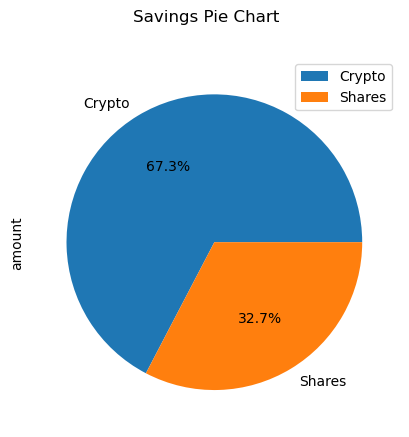

In [12]:
# Plot savings pie chart

df_savings.plot(kind='pie', y='amount', autopct='%1.1f%%', subplots=True, title='Savings Pie Chart')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = df_savings['amount'].sum()

# Validate saving health

savings_difference = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations!! You have plenty of money in your emergency fund! Treat Yourself!")
elif total_savings == emergency_fund:
    print("Congratulations! you have exactly the right amount in your emergency fund! There's always room for more!")
else:
    print(f"You are ${abs(savings_difference): .2f} away from reaching your emergency fund goal.")
    

Congratulations!! You have plenty of money in your emergency fund! Treat Yourself!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG

timeframe = "1Day"
ticker = ['AGG', 'SPY']
df_stock_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=10000
).df

# Reorganize the DataFrame
# Separate ticker data

SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG', 'SPY'])


# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data

MC_30_year.portfolio_data.head()


AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [18]:
# Running a MC Simulation to forecast 30 yeats of cumulative returns

MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 110.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 120.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 130.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 140.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 150.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 160.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 170.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 180.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 190.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 200.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 210.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 220.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 230.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 240.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 250.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 260.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 270.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 280.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 290.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 300.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 310.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 320.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 330.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 340.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 350.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 360.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 370.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 380.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 390.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 400.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 410.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 420.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 430.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 440.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 450.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 460.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 470.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 480.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 490.


C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\nawue\OneDrive\Desktop\Class\Homework\Homework 4 Module 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995809,0.981111,1.004049,1.006224,0.988226,1.006856,0.995784,0.997388,1.003481,1.010491,...,0.997744,1.002388,1.001793,0.999598,1.008801,1.011815,1.005236,1.003413,1.008545,1.006869
2,0.999082,0.993792,0.994193,1.004390,0.980694,1.012330,0.997691,0.996458,1.004346,1.015438,...,1.006507,0.997346,0.996830,0.998528,1.014261,1.007692,1.002140,1.004831,1.015401,1.012253
3,1.001773,0.993501,1.002127,0.996850,0.991930,1.019646,0.997262,0.995954,1.002530,1.007379,...,1.007723,0.990560,1.002882,0.993148,1.017993,1.016170,1.000580,1.010504,1.022475,1.005333
4,0.996037,1.009305,1.004082,1.005952,1.006599,1.023381,0.991487,0.995816,0.997650,1.011591,...,1.004927,0.999741,0.998197,1.003092,1.013121,1.014478,0.992515,0.999095,1.020730,0.999939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.945010,44.384937,6.342860,12.017406,25.026032,13.264827,9.485342,5.775477,3.500609,14.967504,...,10.226880,46.372526,15.330059,11.742614,40.732360,7.053090,28.213946,17.176129,20.425148,6.612820
7557,5.008943,44.973758,6.291914,12.013867,24.918885,13.464249,9.511415,5.795815,3.437140,15.148746,...,10.254494,45.862196,15.395337,11.701733,40.590926,7.101339,28.209069,17.340846,20.423978,6.613258
7558,5.001071,44.943773,6.322769,11.943223,25.179410,13.600708,9.556406,5.787340,3.439261,15.127132,...,10.283354,46.376188,15.444417,11.699272,40.672217,7.147257,27.962194,17.399312,20.301028,6.582657
7559,5.019706,44.788750,6.347726,11.922159,25.238718,13.466269,9.488268,5.717207,3.437382,15.121163,...,10.265177,46.511618,15.533952,11.747486,41.030130,7.113668,28.006775,17.468205,20.449510,6.590174


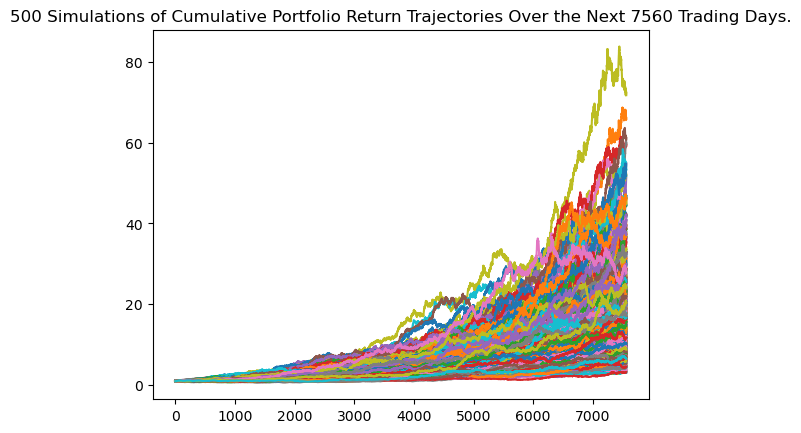

In [19]:
# Plot simulation outcomes

line_plot = MC_30_year.plot_simulation()

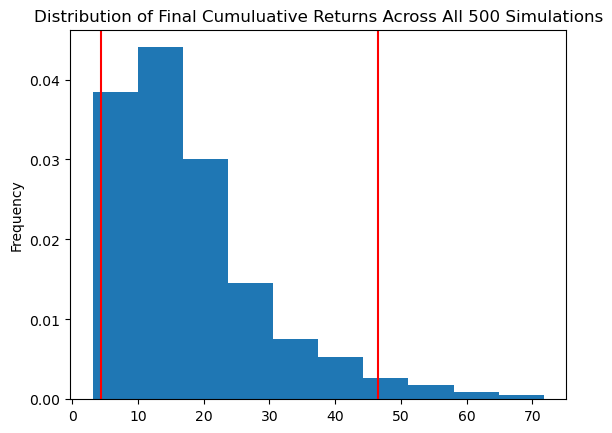

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_30_year.summarize_cumulative_return()

print(dir(MC_30_year))

print(summary_stats)

AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
#print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      #f" over the next 30 years will end within in the range of"
      #f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
#print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      #f" over the next 30 years will end within in the range of"
      #f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
#print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      #f" over the next 5 years will end within in the range of"
      #f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
#print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      #f" over the next 10 years will end within in the range of"
      #f" ${ci_lower_ten} and ${ci_upper_ten}")